# KNN Model

In [12]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

In [13]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

# Creating a model. 

In [14]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [15]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [17]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)

Z_test = sc.transform(X_test)



In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Z_train, y_train)
knn.score(Z_test, y_test)

0.6540892549320053

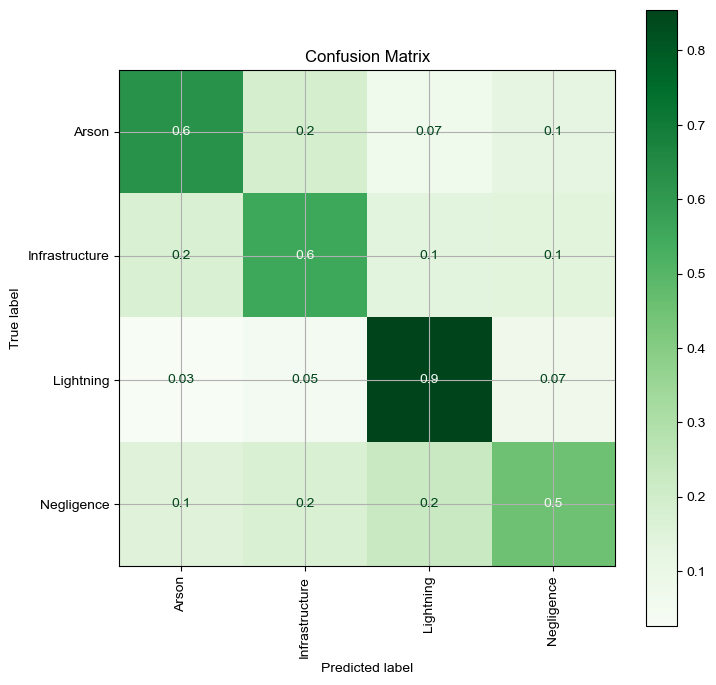

<Figure size 8000x8000 with 0 Axes>

''

In [19]:
f,ax = plt.subplots(1,1,figsize=(8,8))

cm= ConfusionMatrixDisplay.from_estimator(knn,Z_test,y_test, cmap = 'Greens',normalize= 'true', xticks_rotation='vertical', values_format='.1g', ax=ax)
plt.title("Confusion Matrix")
plt.grid(None)
plt.figure(figsize = (80,80))
sns.set(font_scale=.8)

plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"
plt.show()
;